
# CODE TO CLASSIFY KYPHOSIS DISEASE USING DECISION TREES AND RANDOM FOREST CLASSIFIER




# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset


# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [2]:
df_kyphosis=pd.read_csv('kyphosis.csv')

In [3]:
df_kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df_kyphosis.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
df_kyphosis.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df_kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# VISUALIZING DATASET

<Axes: xlabel='Kyphosis', ylabel='count'>

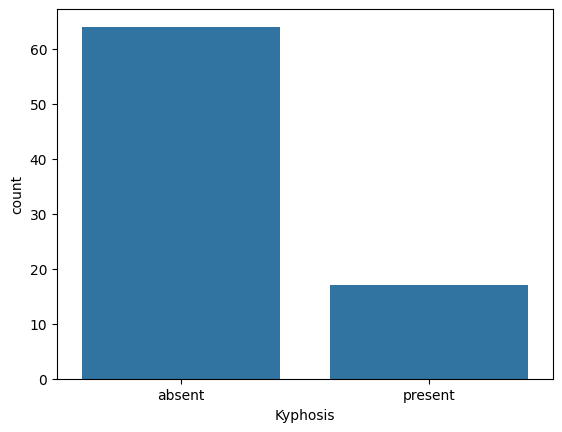

In [7]:
sns.countplot(data=df_kyphosis,x='Kyphosis')

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_kyphosis['Kyphosis'] = label_encoder.fit_transform(df_kyphosis['Kyphosis'])

In [9]:
df_kyphosis

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [10]:
kyphosis_true=df_kyphosis[df_kyphosis['Kyphosis']==1]

In [11]:
kyphosis_true

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12
24,1,15,7,2
37,1,52,5,6
39,1,91,5,12
40,1,73,5,1
45,1,139,3,10


In [12]:
kyphosis_false=df_kyphosis[df_kyphosis['Kyphosis']==0]

In [13]:
kyphosis_false

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
...,...,...,...,...
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13


In [14]:
print('kyphosis is absent percentage:',(len(kyphosis_false)/len(df_kyphosis))*100)

kyphosis is absent percentage: 79.01234567901234


In [15]:
print('kyphosis is present percentage:',(len(kyphosis_true)/len(df_kyphosis))*100)

kyphosis is present percentage: 20.98765432098765


In [16]:
sns.__version__

'0.13.2'

<Axes: >

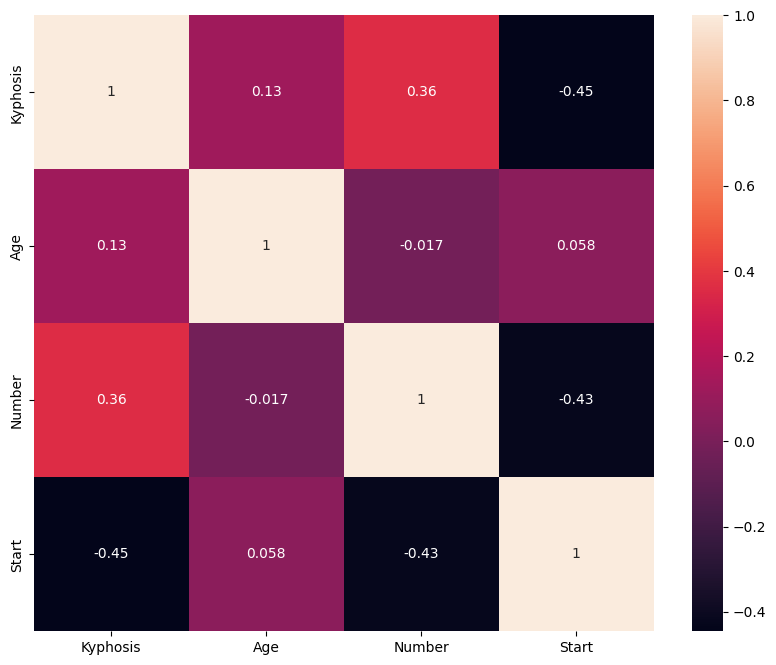

In [18]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df_kyphosis.corr(), annot=True)

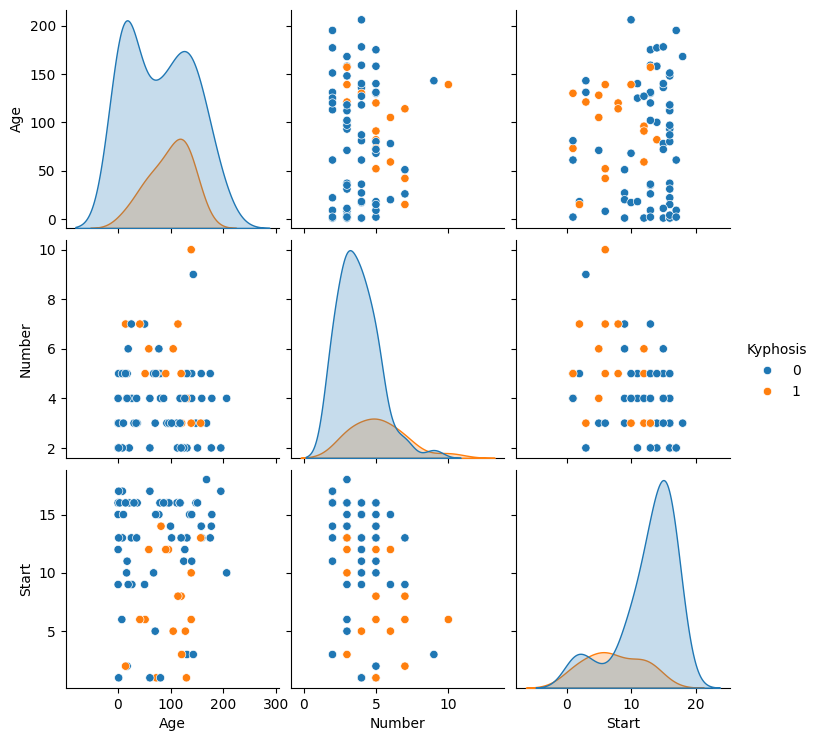

In [19]:
sns.pairplot(df_kyphosis,hue='Kyphosis',vars=['Age','Number','Start'])

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [21]:
X=df_kyphosis.drop(['Kyphosis'],axis=1)

In [22]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [23]:
y=df_kyphosis['Kyphosis']

In [24]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# TRAINING THE MODEL

In [51]:
X_train.shape

(56, 3)

In [52]:
X_test.shape

(25, 3)

In [53]:
y_train.shape

(56,)

In [54]:
y_test.shape

(25,)

In [55]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
feature_importance=pd.DataFrame(decision_tree.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [57]:
feature_importance

,importance
Start,0.555108
Age,0.342803
Number,0.102089


# EVALUATING THE MODEL 

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
y_predict_train=decision_tree.predict(X_train)

In [60]:
y_predict_train

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [61]:
cm=confusion_matrix(y_train,y_predict_train)

<Axes: >

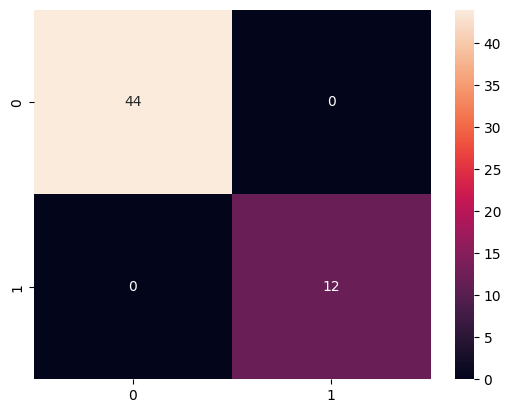

In [62]:
sns.heatmap(cm,annot=True)

In [63]:
y_predict=decision_tree.predict(X_test)

In [64]:
y_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0])

In [65]:
cm=confusion_matrix(y_test,y_predict)

<Axes: >

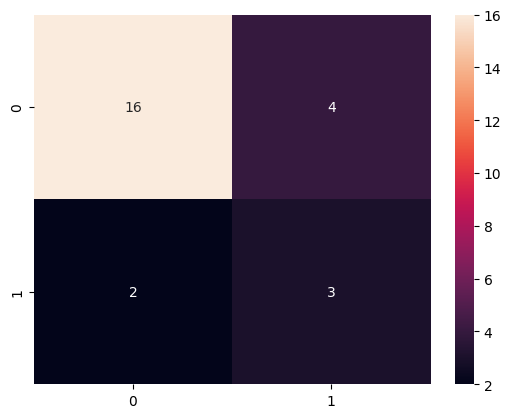

In [66]:
sns.heatmap(cm,annot=True)

In [67]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.43      0.60      0.50         5

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25



# IMPROVING THE MODEL 

In [69]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [71]:
y_predict_train=RandomForest.predict(X_train)

In [72]:
y_predict_train

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [73]:
cm=confusion_matrix(y_train,y_predict_train)

<Axes: >

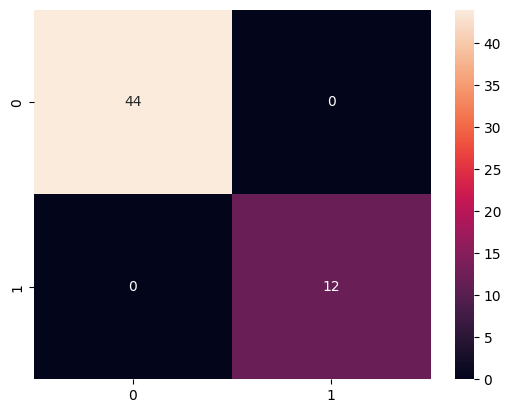

In [74]:
sns.heatmap(cm,annot=True)

<Axes: >

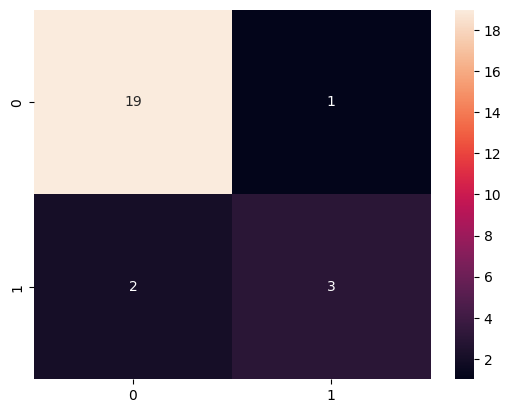

In [75]:
y_predict=RandomForest.predict(X_test)
cm= confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [76]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25

